In [1]:
import pandas as pd
import numpy as np
import folium
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from tqdm import tqdm

get_ipython().run_line_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system sorry.")


In [2]:
starbucks = pd.read_csv("../test_data/starbucks_raw_2.csv", encoding="utf-8", index_col=0)
starbucks.head()

,구,매장이름,주소,lat,lng
0,서울 강남구,역삼이마트,서울특별시 강남구 역삼로 310 (역삼동),37.495461,127.040493
1,서울 강남구,삼성동,서울특별시 강남구 영동대로96길 12 (삼성동),37.513611,127.059256
2,서울 강남구,테헤란로아남타워,서울특별시 강남구 테헤란로 311 (역삼동),37.503750,127.044836
3,서울 강남구,대치삼성프라자,서울특별시 강남구 영동대로 237 (대치동),37.500310,127.066961
4,서울 강남구,강남세곡,서울특별시 강남구 헌릉로569길 18 (세곡동),37.467219,127.100010


In [3]:
ediya = pd.read_csv("../test_data/ediya_raw_2.csv", encoding="utf-8", index_col=0)
ediya.head()

,구,매장이름,주소,lat,lng
0,서울 강남구,강남YMCA점,서울 강남구 논현동,37.509902,127.035706
1,서울 강남구,강남구청역아이티웨딩점,"서울 강남구 학동로 338 (논현동, 강남파라곤)",37.516466,127.040419
2,서울 강남구,강남논현학동점,서울 강남구 논현로131길 28 (논현동),37.514040,127.028091
3,서울 강남구,강남대치점,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",37.501251,127.052382
4,서울 강남구,강남도산점,서울 강남구 도산대로37길 20 (신사동),37.520623,127.036113


### 데이터 체크

---

In [4]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       566 non-null    object 
 1   매장이름    566 non-null    object 
 2   주소      566 non-null    object 
 3   lat     558 non-null    float64
 4   lng     558 non-null    float64
dtypes: float64(2), object(3)
memory usage: 26.5+ KB


- 위도, 경도값에 null값이 있는것을 발견 지워 주도록 하자

In [5]:
starbucks = starbucks.dropna(axis = 0) # 결측값이 들어있는 행 전체를 삭제함

In [6]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 565
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       558 non-null    object 
 1   매장이름    558 non-null    object 
 2   주소      558 non-null    object 
 3   lat     558 non-null    float64
 4   lng     558 non-null    float64
dtypes: float64(2), object(3)
memory usage: 26.2+ KB


In [7]:
starbucks.tail()

,구,매장이름,주소,lat,lng
561,서울 중랑구,상봉역,서울특별시 중랑구 망우로 307 (상봉동),37.596897,127.086455
562,서울 중랑구,사가정역,서울특별시 중랑구 면목로 310,37.579564,127.087969
563,서울 중랑구,중랑구청,서울특별시 중랑구 신내로 72,37.605444,127.095712
564,서울 중랑구,중랑역,서울특별시 중랑구 망우로30길 3 (상봉동),37.593033,127.074736
565,서울 중랑구,상봉,"서울특별시 중랑구 상봉로 131 (상봉동, 상봉 듀오트리스 주상복합)",37.597782,127.092509


In [8]:
ediya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 721
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       722 non-null    object 
 1   매장이름    722 non-null    object 
 2   주소      722 non-null    object 
 3   lat     708 non-null    float64
 4   lng     708 non-null    float64
dtypes: float64(2), object(3)
memory usage: 33.8+ KB


In [9]:
ediya = ediya.dropna(axis=0)

In [10]:
ediya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 721
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       708 non-null    object 
 1   매장이름    708 non-null    object 
 2   주소      708 non-null    object 
 3   lat     708 non-null    float64
 4   lng     708 non-null    float64
dtypes: float64(2), object(3)
memory usage: 33.2+ KB


### 결측값이 들어있는 행을 제거 했으니 이제 위도 경도 값을 이용해 지도에 마커를 찍음으로써 개략적으로 스타벅스 매장과 이디야 매장의 위치를 비교해본다.

---

### 지도에 마커를 찍어 대략적인 분포를 확인해보기

In [11]:
cafe_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

# 스타벅스 마커 찍기
for idx, row in tqdm(starbucks.iterrows()):
    folium.Marker(
        location=[row["lat"], row["lng"]],
        popup=row["주소"],
        tooltip=row["매장이름"],
        icon=folium.Icon(
            icon="coffee",
            prefix="fa",
            color='green'
        )
    ).add_to(cafe_map)

# 이디야 마커 찍기
for idx, row in tqdm(ediya.iterrows()):
    folium.Marker(
        location=[row["lat"], row["lng"]],
        popup=row["주소"],
        tooltip=row["매장이름"],
        icon=folium.Icon(
            icon="coffee",
            prefix="fa",
            color='blue'
        )
    ).add_to(cafe_map)


cafe_map

558it [00:00, 6412.92it/s]
708it [00:00, 6614.38it/s]


- 일단 서울시내에 스타벅스 매장과 이디야 매장이 너무 많아 마커로는 두 지점이 가까이 붙어있는 경향이 있는지 정확히 식별이 어렵다. 어떤 경우는 도로 맞은편에 있는것처럼 보이기도 하고 아예 두 지점이 많이 입점해있는 구 자체도 달라보이기도 한다.
따라서 각 구별 매장수를 비교해 두 지점이 많이 겹치는 매장을 통해 이디야가 정말 스타벅스 매장 근처에 입점하는지 검증해보도록 하자

---

### 서울 각 구별 스타벅스 매장수와 이디야 매장수 비교해보기

In [12]:
starbucks["구"].value_counts()

서울 강남구     87
서울 중구      56
서울 서초구     46
서울 종로구     39
서울 영등포구    37
서울 송파구     34
서울 마포구     32
서울 강서구     21
서울 용산구     21
서울 서대문구    20
서울 광진구     17
서울 양천구     17
서울 강동구     15
서울 성북구     14
서울 노원구     13
서울 성동구     12
서울 관악구     11
서울 금천구     11
서울 동작구     11
서울 구로구     10
서울 동대문구     9
서울 은평구      8
서울 중랑구      8
서울 강북구      6
서울 도봉구      3
Name: 구, dtype: int64

In [13]:
starbucks_gu_count = pd.DataFrame(data=starbucks["구"].value_counts())
starbucks_gu_count.tail()


,구
서울 동대문구,9
서울 은평구,8
서울 중랑구,8
서울 강북구,6
서울 도봉구,3


In [14]:
starbucks_gu_count.rename(columns={"구" : "스타벅스 매장수"}, inplace=True)

In [27]:
starbucks_gu_count = starbucks_gu_count.sort_values(by="스타벅스 매장수", ascending=False)
starbucks_gu_count.reset_index(inplace=True)
starbucks_gu_count.rename(columns={"index" : "구"}, inplace=True)

In [28]:
starbucks_gu_count.head()

,구,스타벅스 매장수
0,서울 강남구,87
1,서울 중구,56
2,서울 서초구,46
3,서울 종로구,39
4,서울 영등포구,37


In [16]:
ediya_gu_count = pd.DataFrame(data=ediya["구"].value_counts())
ediya_gu_count.tail()

,구
서울 동대문구,22
서울 금천구,22
서울 서대문구,21
서울 강북구,19
서울 용산구,15


In [29]:
ediya_gu_count.rename(columns={"구" : "이디야 매장수"}, inplace=True)
ediya_gu_count.reset_index(inplace=True)
ediya_gu_count.rename(columns={"index" : "구"}, inplace=True)
ediya_gu_count = ediya_gu_count.sort_values(by="이디야 매장수", ascending=False)
ediya_gu_count.head()

,구,이디야 매장수
0,서울 강남구,45
1,서울 강서구,45
2,서울 송파구,40
3,서울 영등포구,39
4,서울 마포구,39


In [30]:
len(starbucks_gu_count), len(ediya_gu_count)

(25, 25)

In [32]:
gu_count_data = pd.merge(starbucks_gu_count, ediya_gu_count, on="구")
gu_count_data

,구,스타벅스 매장수,이디야 매장수
0,서울 강남구,87,45
1,서울 중구,56,29
2,서울 서초구,46,30
3,서울 종로구,39,31
4,서울 영등포구,37,39
5,서울 송파구,34,40
6,서울 마포구,32,39
7,서울 강서구,21,45
8,서울 용산구,21,15
9,서울 서대문구,20,21


In [50]:
label = list(gu_count_data["구"].values)
label

['서울 강남구',
 '서울 중구',
 '서울 서초구',
 '서울 종로구',
 '서울 영등포구',
 '서울 송파구',
 '서울 마포구',
 '서울 강서구',
 '서울 용산구',
 '서울 서대문구',
 '서울 광진구',
 '서울 양천구',
 '서울 강동구',
 '서울 성북구',
 '서울 노원구',
 '서울 성동구',
 '서울 관악구',
 '서울 금천구',
 '서울 동작구',
 '서울 구로구',
 '서울 동대문구',
 '서울 은평구',
 '서울 중랑구',
 '서울 강북구',
 '서울 도봉구']

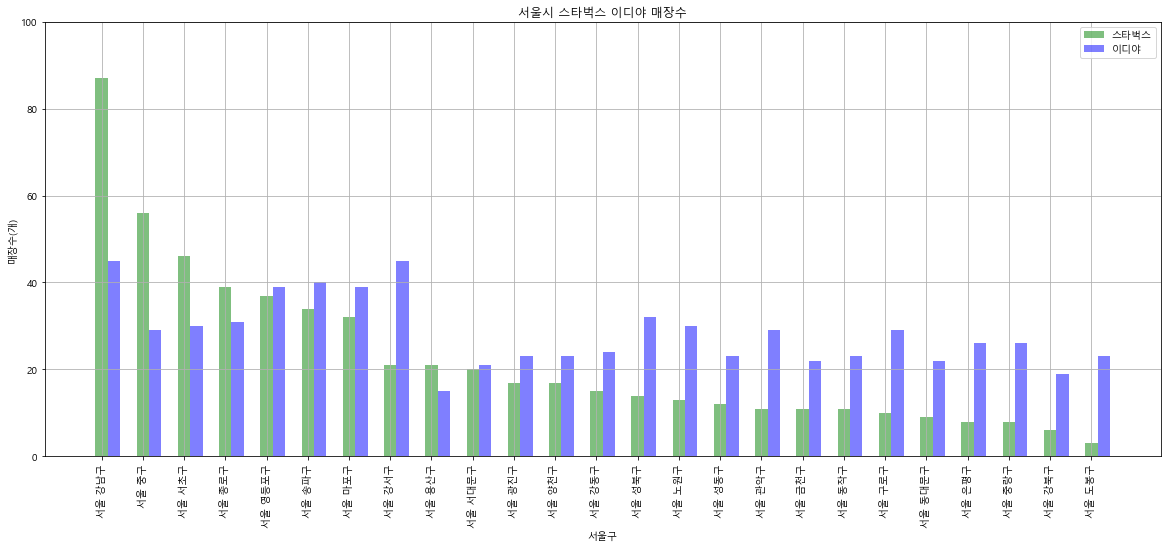

In [53]:
plt.figure(figsize=(20, 8))

x = np.array(range(len(gu_count_data["구"])))
w = 0.3
label = list(gu_count_data["구"].values)

plt.bar(x, gu_count_data["스타벅스 매장수"],
             width = w, 
             color='g', 
             alpha=0.5,
)
x = x + w
plt.bar(x, gu_count_data["이디야 매장수"],
             width = w,
             color='b', 
             alpha=0.5,
)
plt.legend(labels=["스타벅스", "이디야"])
plt.grid(True)
plt.title("서울시 스타벅스 이디야 매장수")
plt.xlabel("서울구")
plt.xticks(np.arange(len(label)), label,rotation="vertical")
plt.ylabel("매장수(개)")
plt.ylim(0,100)
plt.show()

- 위 매장과의 차이를 보면 스타벅스는 강남구쪽에 매장이 제일 많고 그 다음 중구, 서초구 순으로많다. 이디야는 강서구쪽에 제일 많고 그 다음 강남, 송파 영등포구 순으로 많다. 매장 수치로만 보면 이디야는 강남구 강서구에
45군대가 조회되므로 각각 매장이 제일 많은 강남구를 비교해봄으로써 이디야 매장이 정말 스타벅스 매장과 가까운지 검증해 보도록 한다.